In [1]:
# this is to make the Jupyter notebook as wide as the screen (on the Mac at least) #
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%config InlineBackend.figure_format ='retina'


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from scipy import signal as sg
from datetime import datetime as dt
import xarray as xr

In [3]:
def prcrng(x):
    return (np.nanpercentile(x,84) - np.nanpercentile(x,16))/2.

In [4]:
dir_acs = "/users/rsg/spa/spapapers/Pardo_Globlal_Chla/insitu/reprocessing/netCDF/SeaBASS2022/"
fn_acs = "LineP.nc"

In [41]:
# read ACS (and HPLC) data in xr format
acs = xr.open_dataset(dir_acs + fn_acs)

# check keys
print(acs.keys())

#check attributes
acs['acs_chl'].attrs

# no of samples
print('No. of HPLC samples= ' + str(len(acs.hplc_time)))
print('No of ACS samples= ' + str(len(acs.time)))

print('No of ACS samples (nnan)= ' + str(np.sum(~np.isnan(acs.acs_chl))))

KeysView(<xarray.Dataset>
Dimensions:         (time: 573, hplc_time: 13, acs_wv: 176)
Coordinates:
  * time            (time) datetime64[ns] 2009-08-20T04:45:01 ... 2009-08-31T...
  * hplc_time       (hplc_time) datetime64[ns] 2009-08-21T15:42:00 ... 2009-0...
  * acs_wv          (acs_wv) float64 400.0 402.0 404.0 ... 746.0 748.0 750.0
Data variables:
    hplc_lat        (hplc_time) float64 ...
    hplc_lon        (hplc_time) float64 ...
    hplc_Tot_Chl_a  (hplc_time) float64 ...
    uway_lat        (time) float64 ...
    uway_lon        (time) float64 ...
    acs_chl         (time) float64 ...
    acs_ap          (time, acs_wv) float64 ...)
No. of HPLC samples= 13
No of ACS samples= 573
No of ACS samples (nnan)= <xarray.DataArray 'acs_chl' ()>
array(573)


['2009-08-20T04:45:01.000000000' '2009-08-20T05:15:01.000000000'
 '2009-08-20T05:30:01.000000000' '2009-08-20T05:45:01.000000000'
 '2009-08-20T06:15:01.000000000' '2009-08-20T06:30:01.000000000'
 '2009-08-20T06:45:01.000000000' '2009-08-20T07:15:01.000000000'
 '2009-08-20T07:30:01.000000000' '2009-08-20T08:15:01.000000000'
 '2009-08-20T08:30:01.000000000' '2009-08-20T08:45:01.000000000'
 '2009-08-20T09:15:01.000000000' '2009-08-20T09:30:01.000000000'
 '2009-08-20T10:30:01.000000000' '2009-08-20T10:45:01.000000000'
 '2009-08-20T11:30:01.000000000' '2009-08-20T11:45:01.000000000'
 '2009-08-20T12:15:01.000000000' '2009-08-20T13:30:01.000000000'
 '2009-08-20T14:15:01.000000000' '2009-08-20T14:30:01.000000000'
 '2009-08-20T14:45:01.000000000' '2009-08-20T15:15:01.000000000'
 '2009-08-20T15:30:01.000000000' '2009-08-20T15:45:01.000000000'
 '2009-08-20T16:15:01.000000000' '2009-08-20T16:30:01.000000000'
 '2009-08-20T16:45:01.000000000' '2009-08-20T17:15:01.000000000'
 '2009-08-20T17:30:01.000

Text(0, 0.5, 'lon')

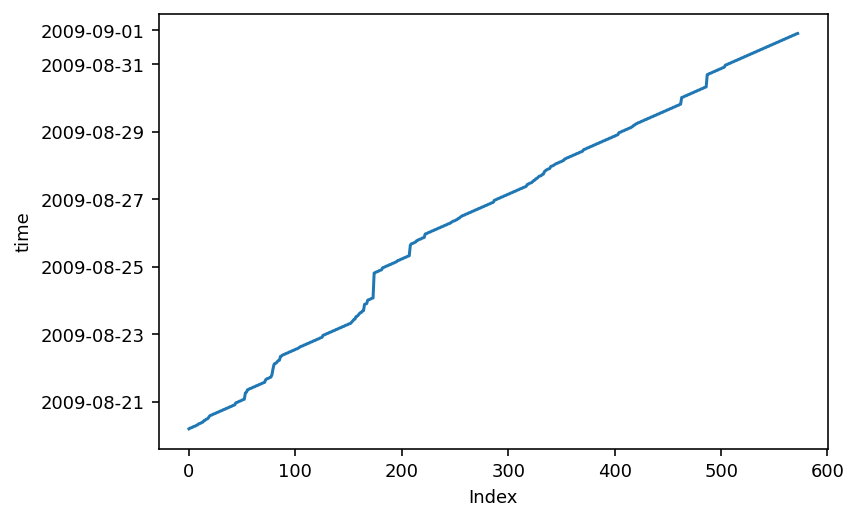

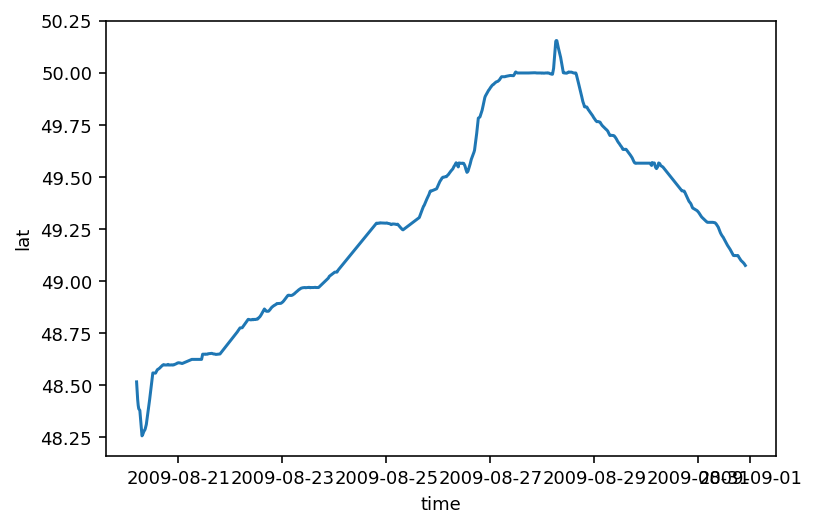

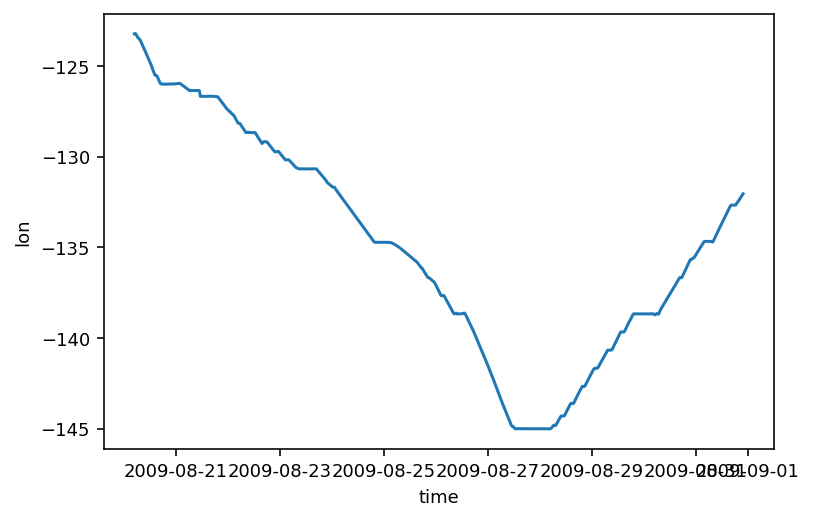

In [42]:
# check time, lat, lon
plt.rcParams.update({'font.size': 9})
    
plt.figure()
plt.plot(acs.time)
plt.xlabel('Index')
plt.ylabel('time')
print(acs.time.values)

plt.figure()
plt.plot(acs.time, acs.uway_lat)
plt.xlabel('time')
plt.ylabel('lat')

plt.figure()
plt.plot(acs.time, acs.uway_lon)
plt.xlabel('time')
plt.ylabel('lon')

# repeat time indicies are present - must remove

In [43]:
#_, index = np.unique(acs['time'], return_index=True)
#acs = acs.isel(time=index)
 
## check time, lat, lon
#plt.rcParams.update({'font.size': 9})
    
#plt.figure()
#plt.plot(acs.time)
#plt.xlabel('Index')
#plt.ylabel('time')
#print(acs.time.values)



In [44]:
# check temporal sample rate
plt.figure()
delta_t = np.median(np.diff(acs.time))
print(delta_t)
print(str(int(delta_t/10**9)) + ' secs')



900000000000 nanoseconds
900 secs


<Figure size 432x288 with 0 Axes>

(0.0, 0.5)

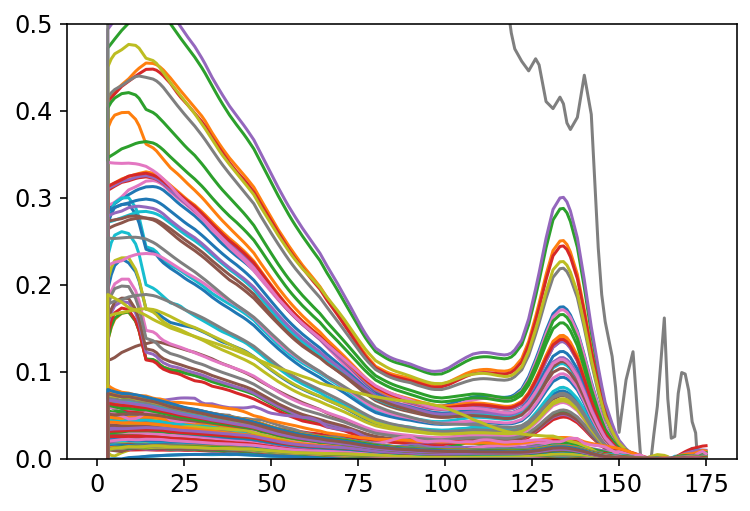

In [96]:
plt.figure()
plt.plot(acs.acs_ap.T)
plt.ylim(0,0.5)


['hplc_lat', 'hplc_lon', 'hplc_Tot_Chl_a', 'uway_lat', 'uway_lon', 'acs_chl', 'acs_ap']


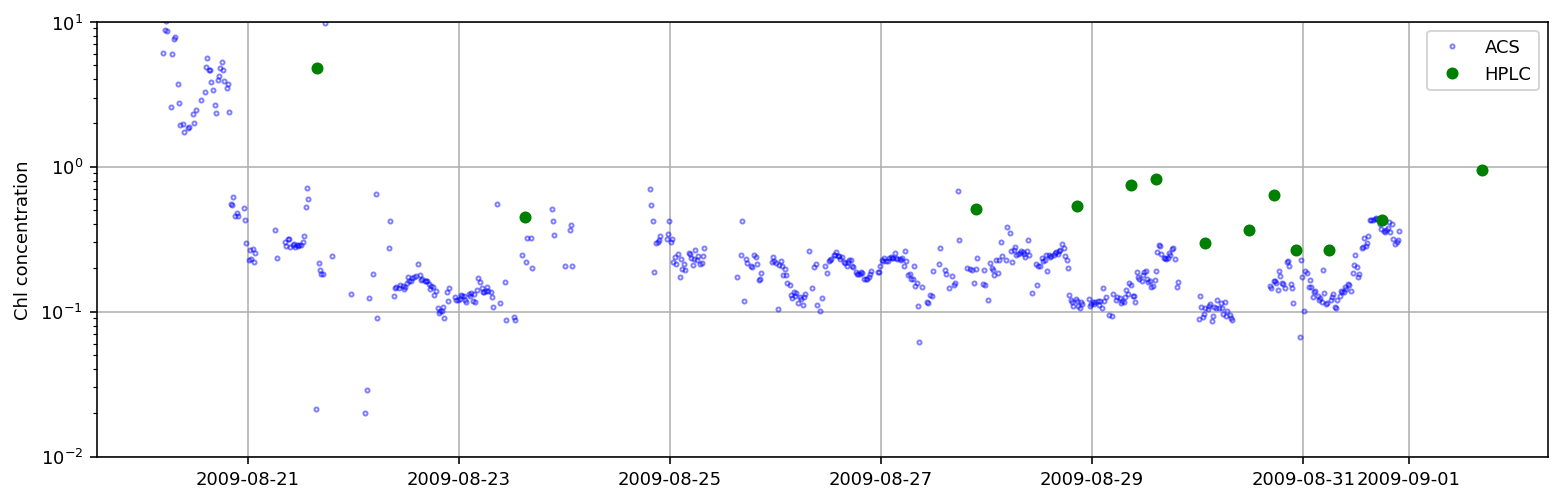

In [46]:
# Test plot of ACS(9) and HPLC Chl prior to match-up
# include emprical adjustment of AC9 chl using AMT
MEDFILT_WIN = 1 # window length of med filter in minutes - note: this assumes data has been binned at 1 minute

#
fig2, ax2 = plt.subplots(1, figsize=(13, 4))
ax2.semilogy(acs.time, sg.medfilt(acs.acs_chl, kernel_size=MEDFILT_WIN), 'bo', lw=1, ms=2, mfc='none', alpha = 0.5, label='ACS')
ax2.grid('on')
plt.legend()
plt.ylim([1e-2, 10])
plt.ylabel('Chl concentration')

#
print(list(acs.keys()))
ax2.semilogy(acs.hplc_time, acs.hplc_Tot_Chl_a, 'go', ms=5, alpha=1, label='HPLC')#, mfc='none')
# a2.semilogy(df_CTD.index, df_CTD.Tot_Chl_a, 'ko', ms=7, alpha=1, mfc='none', zorder=60)
# ax2.scatter(df_CTD.index, df_CTD.Tot_Chl_a, c=df_CTD.Bottle.values, s=30, alpha=1, zorder=60, cmap = plt.get_cmap('inferno'), vmin=2, vmax=24)
# ax2.semilogy(df_UND.index, df_UND.Tot_Chl_a, 'ks', ms=7, alpha=0.85, mfc='c')
plt.legend()
#########


## N HPLC is comparable to N_ACS, and bias looks massive - discount!

573
573
566


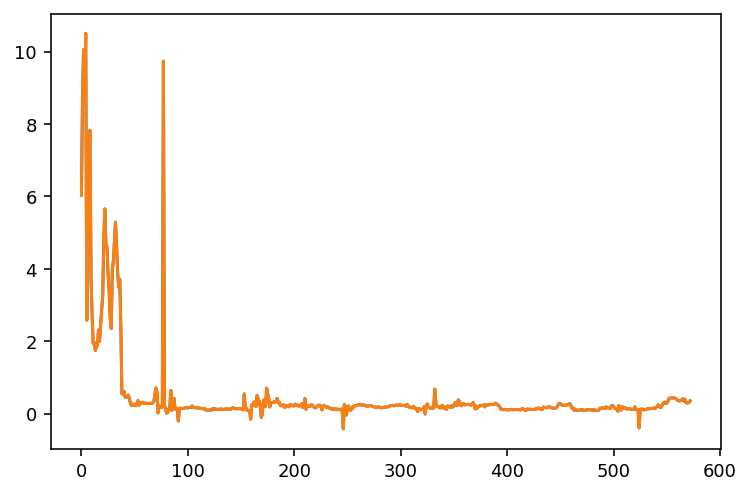

In [47]:
# step x - # median filter
plt.figure()
acs['acs_chl'].values = sg.medfilt(acs.acs_chl, kernel_size = MEDFILT_WIN) # apply med filter to acx chl and acx chl debiasesd 
plt.plot(acs['acs_chl'].values)
print(len(acs['acs_chl'].values))

# step y  #filters w.r.t. ap(420) (10th element) being > 0
i2kp = np.where((acs.acs_ap[:,10] > 0)) [0]
iy = xr.DataArray(acs.time[i2kp], dims=['time']) 
acs_y = acs.sel(time = iy)
plt.plot(acs_y['acs_chl'].values)
print(len(acs_y['acs_chl'].values))

#step z - # filters w.r.t. acs chl being > 0
i2kp = np.where((acs_y.acs_chl[:] > 0)) [0]
iz = xr.DataArray(acs_y.time[i2kp], dims=['time']) 
acs_z = acs_y.sel(time = iz)
print(len(acs_z['acs_chl'].values))



In [48]:
acs = []
acs = acs_z # redefine as filtered data structure

In [105]:
# match-ups #

# creat seriers objects
df_hplc = pd.Series(acs['hplc_Tot_Chl_a'].values,index = acs.hplc_time)
df_acs = pd.Series(acs['acs_chl'].values, index = acs.time)

# filter replicate hplcs
#df_hplc = df_hplc.groupby(df_hplc.index).mean().reindex()

#
df_hplc_acs = pd.DataFrame({'Tot_Chl_a': df_hplc, 'acs_chl': df_acs})
df_hplc_acs = df_hplc_acs.interpolate('index',limit=1).reindex(df_hplc_acs.index, method='nearest',tolerance='30min')


df_hplc_acs['Tot_Chl_a'].iloc[-1] =np.nan

In [106]:
print(df_hplc)
print(df_acs)

print(df_hplc_acs)

# nans in acs_ch are where there are no match-ups

2009-08-21 15:42:00    4.821
2009-08-23 15:08:00    0.451
2009-08-27 21:30:00    0.510
2009-08-28 20:38:00    0.536
2009-08-29 08:56:00    0.748
2009-08-29 14:36:00    0.818
2009-08-30 01:45:00    0.299
2009-08-30 11:45:00    0.368
2009-08-30 17:15:00    0.635
2009-08-30 22:26:00    0.268
2009-08-31 05:50:00    0.266
2009-08-31 17:55:00    0.426
2009-09-01 16:35:00    0.956
dtype: float64
2009-08-20 04:45:01     6.038285
2009-08-20 05:15:01     8.739999
2009-08-20 05:30:01    10.052381
2009-08-20 05:45:01     8.579524
2009-08-20 06:15:01    10.499715
                         ...    
2009-08-31 20:30:01     0.317429
2009-08-31 20:45:01     0.293905
2009-08-31 21:15:01     0.303333
2009-08-31 21:30:01     0.311905
2009-08-31 21:45:01     0.357524
Length: 566, dtype: float64
                     Tot_Chl_a    acs_chl
2009-08-20 04:45:01        NaN   6.038285
2009-08-20 05:15:01        NaN   8.739999
2009-08-20 05:30:01        NaN  10.052381
2009-08-20 05:45:01        NaN   8.579524
2009-08

Linear metrics
-0.6832248693448733 0.13007261265378534 24
Log metrics
1.103229164108225 1.6549217891443566 24
Log diff metrics (should approximate linear)
-1.1495652140163215 0.416203619626514 24


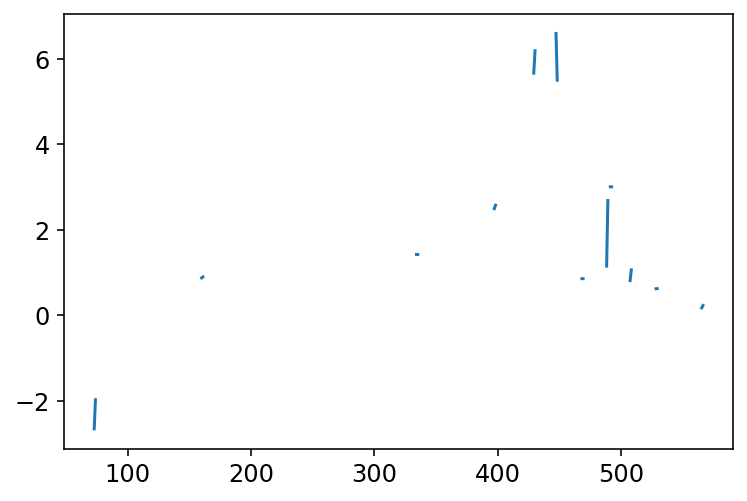

In [107]:
# compute residuals (lin and log space)
rres = df_hplc_acs.acs_chl.values / df_hplc_acs.Tot_Chl_a.values - 1
rres_log = np.log10(df_hplc_acs.acs_chl.values)/ np.log10(df_hplc_acs.Tot_Chl_a.values) - 1
rres_log_diff =(np.log(df_hplc_acs.acs_chl.values) - np.log(df_hplc_acs.Tot_Chl_a.values))
# this approximates rres for small  differences - multiply by = (1/np.log10(np.exp(1))) to convert to log 10


delta = np.nanmedian(rres)
delta_log = np.nanmedian(rres_log)

delta_log_diff = np.nanmedian(rres_log_diff)

sigma = prcrng(rres)
sigma_log = prcrng(rres_log)
sigma_log_diff = prcrng(rres_log_diff)

N = np.sum(~np.isnan(rres))
N_log = np.sum(~np.isnan(rres_log))


print('Linear metrics')
print(delta, sigma, N)

print('Log metrics')
print(delta_log, sigma_log, N)

                   
print('Log diff metrics (should approximate linear)' )
print(delta_log_diff, sigma_log_diff, N)



plt.figure()
plt.plot(rres_log)


['hplc_lat', 'hplc_lon', 'hplc_Tot_Chl_a', 'uway_lat', 'uway_lon', 'acs_chl', 'acs_ap', 'acs_chl_debiased']


/tmp/ipykernel_34766/1828259256.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.
  ax2.semilogy(df_hplc.index, df_hplc.values, 'go', ms=5, color='green', alpha=1, label='HPLC_all')#, mfc='none')
/tmp/ipykernel_34766/1828259256.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.
  ax2.semilogy(df_hplc_acs.index[~np.isnan(rres)==1], df_hplc_acs.Tot_Chl_a[~np.isnan(rres)==1], 'go', ms=5, color='red', alpha=1, label='HPLC matches')#, mfc='none')


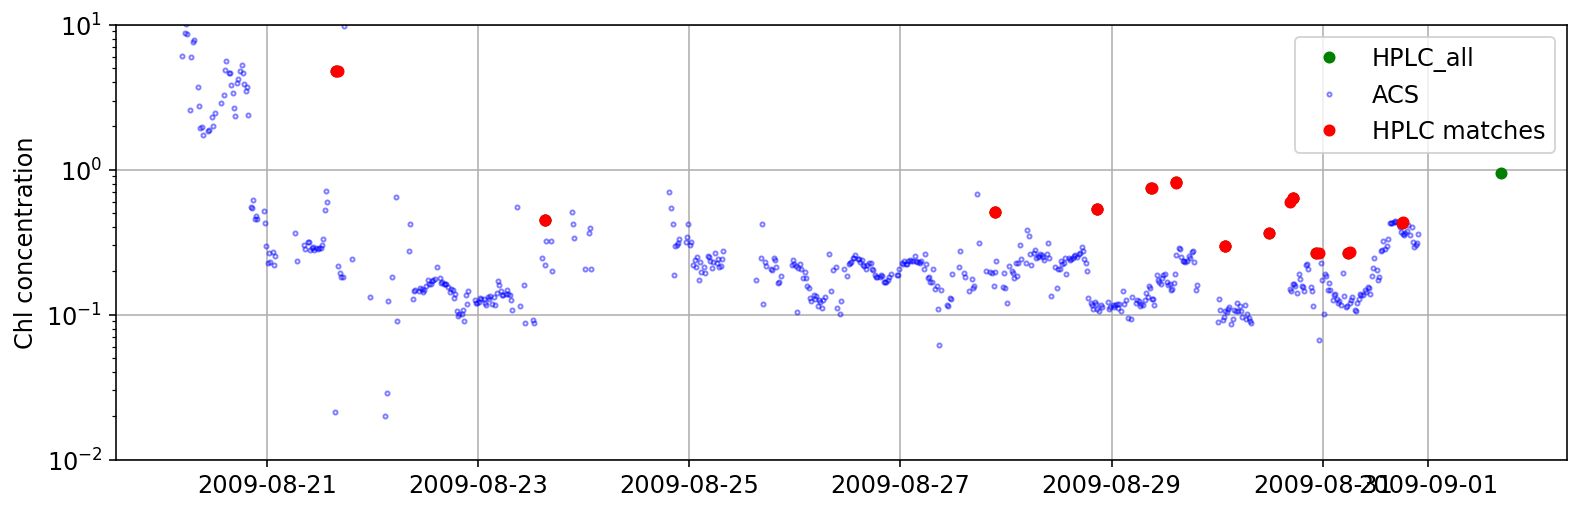

In [108]:
# Test plot of ACS(9) and HPLC Chl post match-up


MEDFILT_WIN = 1 # window length of med filter in minutes - note: this assumes data has been binned at 1 minute. 

#
fig2, ax2 = plt.subplots(1, figsize=(13, 4))
ax2.semilogy(df_hplc.index, df_hplc.values, 'go', ms=5, color='green', alpha=1, label='HPLC_all')#, mfc='none')
ax2.semilogy(acs.time, sg.medfilt(acs.acs_chl, kernel_size=MEDFILT_WIN), 'bo', lw=1, ms=2, mfc='none', alpha = 0.5, label='ACS')
ax2.grid('on')
plt.legend()
plt.ylim([1e-2, 10])
plt.ylabel('Chl concentration')

print(list(acs.keys()))
ax2.semilogy(df_hplc_acs.index[~np.isnan(rres)==1], df_hplc_acs.Tot_Chl_a[~np.isnan(rres)==1], 'go', ms=5, color='red', alpha=1, label='HPLC matches')#, mfc='none')
plt.legend()
#########




[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan 4.821      4.77030329        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan       

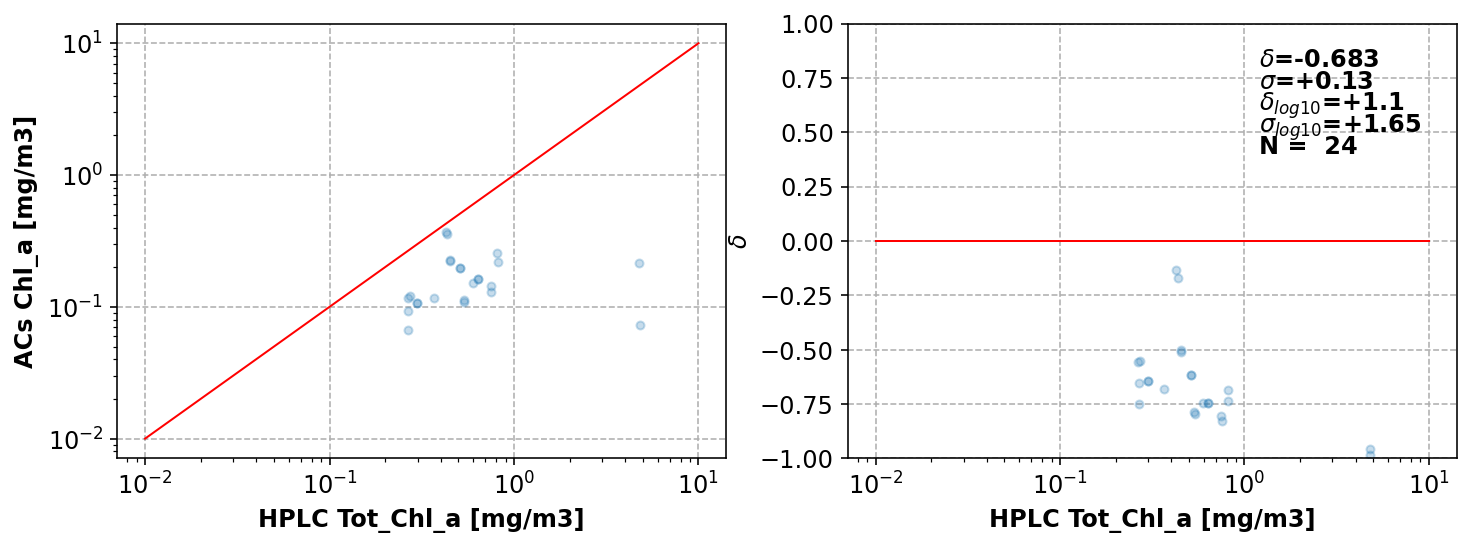

In [109]:
# scatter plots
plt.rcParams.update({'font.size': 12})
    
fig, ax = plt.subplots(1,2, figsize=(12, 4))

ax[0].loglog(df_hplc_acs.Tot_Chl_a.values, df_hplc_acs.acs_chl.values, 'o', ms=4, alpha=0.25)
x = np.logspace(np.log10(0.01), np.log10(10), 100)
ax[0].loglog(x, x, 'r-', lw=1)
ax[0].grid('on', ls='--')
ax[0].set_xlabel('HPLC Tot_Chl_a [mg/m3]', fontweight='bold')
ax[0].set_ylabel('ACs Chl_a [mg/m3]', fontweight='bold')

ax[1].semilogx(df_hplc_acs.Tot_Chl_a.values, rres, 'o', ms=4, alpha=0.25)
ax[1].semilogx(x, x*0, 'r-', lw=1)
ax[1].grid('on', ls='--')
ax[1].set_xlabel('HPLC Tot_Chl_a [mg/m3]', fontweight='bold')
ax[1].set_ylabel('$\delta$', fontweight='bold')
ax[1].set_ylim([-1, 1])
ax[1].text(1.2, 0.8, r'$\delta$='+f'{delta:+0.3}', fontweight='bold')
ax[1].text(1.2, 0.7, r'$\sigma$='+f'{sigma:+0.3}', fontweight='bold')
ax[1].text(1.2, 0.6, r'$\delta_{log10}$='+f'{delta_log:+0.3}', fontweight='bold')
ax[1].text(1.2, 0.5, r'$\sigma_{log10}$='+f'{sigma_log:+0.3}', fontweight='bold')
ax[1].text(1.2, 0.4, f'N = {N: 0}', fontweight='bold')




print(df_hplc_acs.Tot_Chl_a.values)



(-1.0, 1.0)

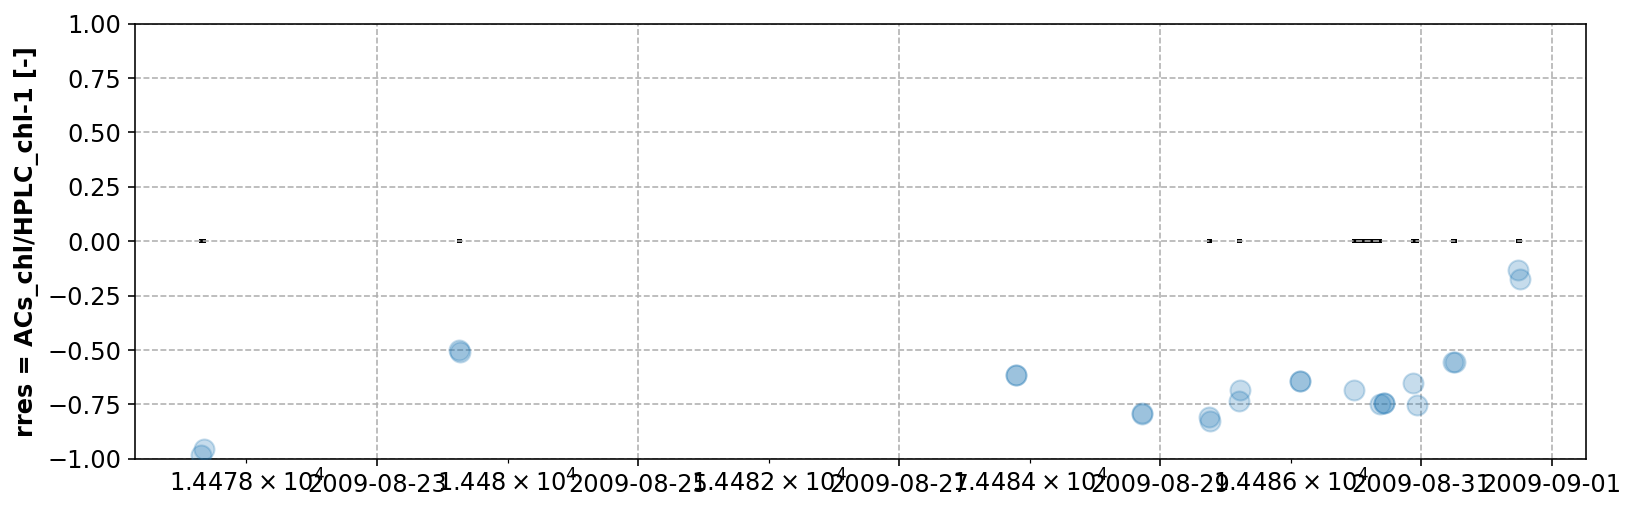

In [110]:
fig, ax = plt.subplots(1,1, figsize=(13, 4))
ax.semilogx(df_hplc_acs.index.values, rres, 'o', ms=10, alpha=0.25, zorder=60)
ax.plot(df_hplc_acs.index.values, rres*0, 'k-', lw=2, zorder=1)
ax.set_ylabel('rres = ACs_chl/HPLC_chl-1 [-]', fontweight='bold')
ax.grid('on', ls='--')
ax.set_ylim([-1, 1])

In [111]:
# Apply log transform prior to fitting power-law. Notation follows Brewin 2016. 
import scipy

linear_mod = scipy.stats.linregress(np.log10(0.014*df_hplc_acs.acs_chl.values[~np.isnan(rres)==1]), np.log10(df_hplc_acs.Tot_Chl_a.values[~np.isnan(rres)==1]))

A = np.round(100*linear_mod.intercept)/100
B = np.round(1000*linear_mod.slope)/1000
r_sq = np.round(1000*linear_mod.rvalue**2)/100

r_sq = np.round(1000*linear_mod.rvalue**2)/1000
stderr = np.round(1000*linear_mod.stderr)/1000
interr = np.round(1000*linear_mod.intercept_stderr)/1000

print('A = ' + str(10**A) + ' +/- ' + str(2*10**interr))
print('B = ' + str(B) + ' +/- ' + str(2*stderr))
print('r_sq = ' + str(r_sq))

A = 1.4454397707459274 +/- 18.156410603563714
B = 0.153 +/- 0.716
r_sq = 0.008


In [112]:
# de-bias ACS-chl following eq 3 in Graban et al., 2020 (https://doi.org/10.1364/OE.397863)
acs['acs_chl_debiased'] = acs.acs_chl*(1-delta)
# acs_out = pd.DataFrame(data = {'lat [degN]': acs.uway_lat[i2f][innan],
#                              'lon [degE]': acs.uway_lon[i2f][innan],
#                             'acs_chl_debiased [mg_m3]': acs.acs_chl_debiased[i2f][innan]
#                           }  ,
# index = acs.time.values[i2f][innan])

In [113]:
# add attributes to acs_chl_debiased #
acs.acs_chl_debiased.attrs["debiasing_equation"] = "acs.acs_chl_debiased = acs.acs_chl*(1-delta)"
acs.acs_chl_debiased.attrs["delta"] = delta
acs.acs_chl_debiased.attrs["sigma"] = sigma
acs.acs_chl_debiased.attrs["units"] = "mg/m3"
acs.acs_chl_debiased.attrs["comments"] = "delta=np.nanmedian(rres), sigma=prcrng(rres), rres=acs_chl/HPLC_Tot_Chl_a-1, based on surface data"
acs.acs_chl_debiased.attrs["HPLC_Tot_chla"] = df_hplc_acs.Tot_Chl_a[~np.isnan(rres)==1].values  # filter nans
acs.acs_chl_debiased.attrs["HPLC_Tot_chla_units"] = "mg/m3"
acs.acs_chl_debiased.attrs["acs_chl"] = df_hplc_acs[~np.isnan(rres)==1].acs_chl.values # filter nans
acs.acs_chl_debiased.attrs["acs_chl_units"] = "mg/m3"
acs.acs_chl_debiased.attrs["processed_on"] = dt.now().strftime("%Y-%m-%d %H:%M:%S.%f")
acs.acs_chl_debiased.attrs["match_up_dates"] = df_hplc_acs[~np.isnan(rres)==1].index.format()

In [114]:

print(acs.acs_chl_debiased)
len(acs.acs_chl_debiased.attrs["match_up_dates"])
len(acs.acs_chl_debiased.attrs["HPLC_Tot_chla"])


<xarray.DataArray 'acs_chl_debiased' (time: 566)>
array([1.01637920e+01, 1.47113837e+01, 1.69204177e+01, 1.44412682e+01,
       1.76733814e+01, 4.34672758e+00, 1.01488832e+01, 1.28122263e+01,
       1.31738798e+01, 6.26993269e+00, 4.60305883e+00, 3.27731877e+00,
       3.31915937e+00, 2.94115487e+00, 3.09697301e+00, 3.16638601e+00,
       3.88889025e+00, 3.37141862e+00, 4.11780917e+00, 4.83534386e+00,
       5.48458743e+00, 8.18351900e+00, 9.52176238e+00, 7.82234708e+00,
       7.77072712e+00, 6.47047630e+00, 5.71767384e+00, 4.45253072e+00,
       3.96102856e+00, 6.67679254e+00, 7.10433065e+00, 8.02048571e+00,
       8.90505909e+00, 7.79926283e+00, 6.57387428e+00, 5.87910369e+00,
       6.24893244e+00, 4.01777730e+00, 9.29941511e-01, 9.13430085e-01,
       1.04504211e+00, 7.67069576e-01, 8.01856178e-01, 7.74604010e-01,
       8.71750071e-01, 7.18496486e-01, 5.00158252e-01, 3.80248510e-01,
       4.47417161e-01, 3.89385964e-01, 4.54951612e-01, 3.73195007e-01,
       4.24493220e-01, 6.14

24

In [115]:
print('max/min conc range for results table')
print(np.min(acs.acs_chl_debiased.attrs["HPLC_Tot_chla"]))
print(np.max(acs.acs_chl_debiased.attrs["HPLC_Tot_chla"])) # quote min max of match-ups 

max/min conc range for results table
0.266
4.821


In [116]:

# save updated NetCDF file
dir_acs_out = '/data/datasets/cruise_data/active/ACS_Chl/Glob_OC_matchups/Debiased_nc/'
acs.to_netcdf(dir_acs_out + fn_acs[:-3] + '_with_debiased_chl.nc')
acs.close()
